# Taylor Series Example

This notebook demonstrates how to expand a function into its Taylor Series 
and visualize how the polynomial approximation matches the original function locally.

---

## What is this notebook for?

- To show how the Taylor Series uses local derivative information to approximate a function near a given point.
- To connect the idea of local slopes (from Chain Rule) to multi-order polynomial approximations.
- To compare the exact function and its approximation on the same plot.

---

## How do we do it?

1. **Symbolic Derivation:**  
   Use `sympy` to automatically expand the Taylor Series up to a given order.  
   This verifies the derivative coefficients without manual calculation.

2. **Numeric Evaluation:**  
   Use `lambdify` to turn the symbolic expression into a fast numerical function.  
   Evaluate the original function and its polynomial approximation over a grid of x values.

3. **Visualization:**  
   Use `matplotlib` to plot the original function and its Taylor approximation together.  
   This clearly shows how well the polynomial matches the function near the expansion point 
   and where it starts to deviate.

---

## Why do we do it this way?

- Doing this by hand is possible but not practical for higher-order terms.
- Using `sympy` ensures that the derivative and coefficients are correct.
- Numerical evaluation and plotting make the approximation error visible,
  which is impossible to see if you only look at the symbolic series.

This workflow builds a clear connection between symbolic calculus, numerical computation, 
and visual intuition — exactly how mathematical modeling should work in practice.

---

## Example Setup

- **Function:** $f(x) = \sin(x)$
- **Expansion point:** $x = 0$ (Maclaurin Series)
- **Tools:** `sympy`, `numpy`, `matplotlib`

---

## Requirements

- numpy
- sympy
- matplotlib


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [12]:
x = sp.symbols('x')
f = sp.sin(x)

In [13]:
taylor_exp = f.series(x, 0, 10).removeO()

In [14]:
print("Taylor expansion up to 9th order:")
print(taylor_exp)

Taylor expansion up to 9th order:
x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


In [15]:
f_func = sp.lambdify(x, f, 'numpy')
taylor_func = sp.lambdify(x, taylor_exp, 'numpy')

X = np.linspace(-2*np.pi, 2*np.pi, 400)

Y_true = f_func(X)
Y_taylor = taylor_func(X)

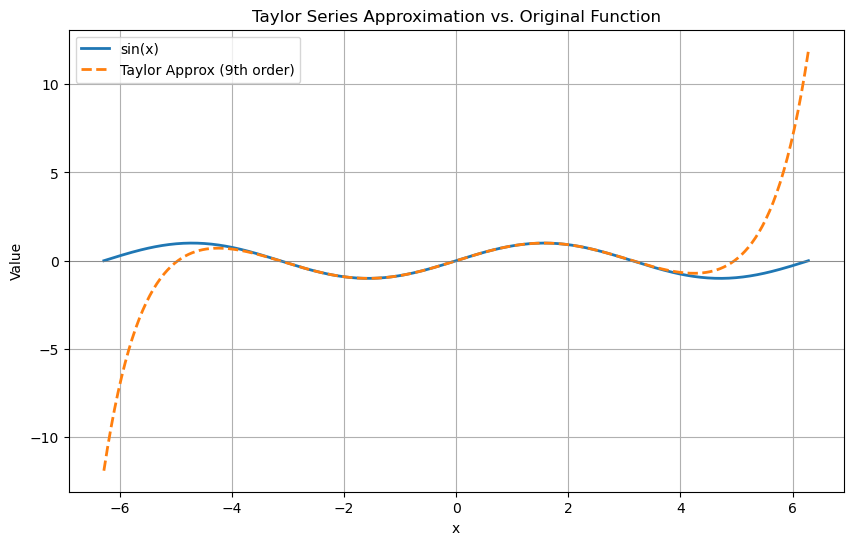

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(X, Y_true, label='sin(x)', lw=2)
plt.plot(X, Y_taylor, label='Taylor Approx (9th order)', lw=2, linestyle='--')
plt.axhline(0, color='gray', lw=0.5)
plt.title('Taylor Series Approximation vs. Original Function')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation – How to read this plot

After plotting the original function and its Taylor polynomial approximation, check these points to verify that the expansion behaves as expected:

---

### 1️. Local Agreement

- Near the expansion point (e.g., \( x = 0 \)), the Taylor polynomial should match the original function very closely.
- This confirms that the polynomial correctly uses the function’s derivatives to capture local behavior.

---

### 2. Accuracy Degrades with Distance

- As you move further away from the expansion point, the polynomial may diverge from the original function.
- This is normal and shows that the Taylor Series is fundamentally a **local approximation**.

---

### 3️. Higher Order → Wider Valid Region

- Increasing the expansion order generally widens the interval where the approximation remains accurate.
- However, no finite-order Taylor polynomial can perfectly approximate a non-polynomial function globally (e.g., \(\sin(x)\) is periodic, but a polynomial is not).

---

### 4️. Smoothness & Continuity

- Both the original and approximation curves should be smooth and continuous.
- Any unexpected jumps, breaks, or spikes may indicate a symbolic or numerical error.

---

## Final Check

If these points hold, then:
- The symbolic expansion is correct.
- The numerical evaluation is consistent.
- The visualization clearly shows the **locality and limitations** of using a Taylor polynomial to approximate a function.

**Key takeaway:**  
A Taylor Series uses local derivative information to match the original function near the expansion point,  
but it naturally diverges outside that region unless the function itself is polynomial.
